In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def f(x):
    return 3*x**2 - 4*x +5

In [33]:
f(3.0)

20.0

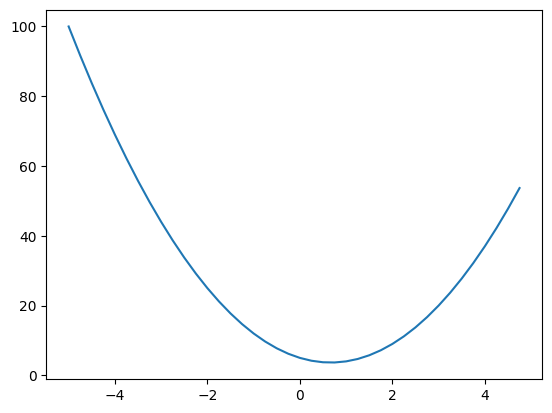

In [34]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [35]:
h = 1
x = np.arange(-5, 5, 0.25)
f(x+h)

array([69.    , 62.1875, 55.75  , 49.6875, 44.    , 38.6875, 33.75  ,
       29.1875, 25.    , 21.1875, 17.75  , 14.6875, 12.    ,  9.6875,
        7.75  ,  6.1875,  5.    ,  4.1875,  3.75  ,  3.6875,  4.    ,
        4.6875,  5.75  ,  7.1875,  9.    , 11.1875, 13.75  , 16.6875,
       20.    , 23.6875, 27.75  , 32.1875, 37.    , 42.1875, 47.75  ,
       53.6875, 60.    , 66.6875, 73.75  , 81.1875])

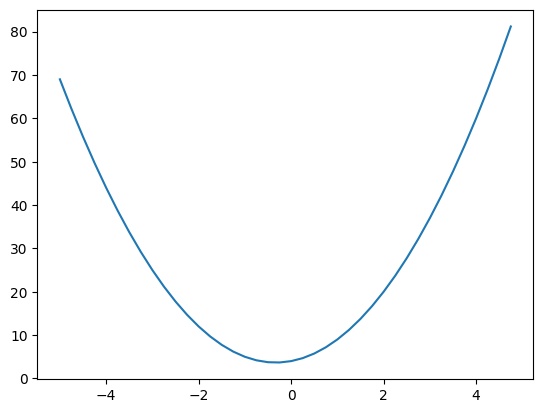

In [36]:
plt.plot(xs, f(x+h))

In [37]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [87]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            self.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')


        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad  
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [81]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

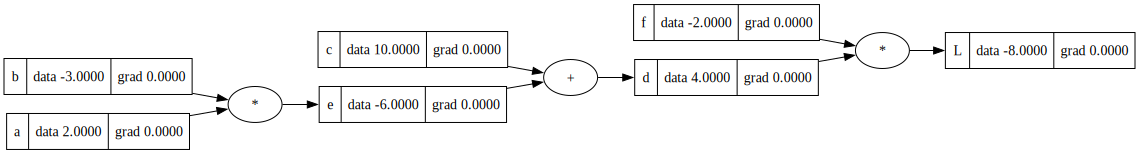

In [48]:
draw_dot(L)

In [49]:
# dd/dc = 1.0
# dd/de = 1.0
# d = c + e

# Want:
# dL/dc = (dl/dd) * (dd/dc)

# know:
# dL/dd
# dd/dc

In [50]:
def lol():

    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    d.data += h
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print((L2 - L1)/h)

lol()

-2.000000000000668


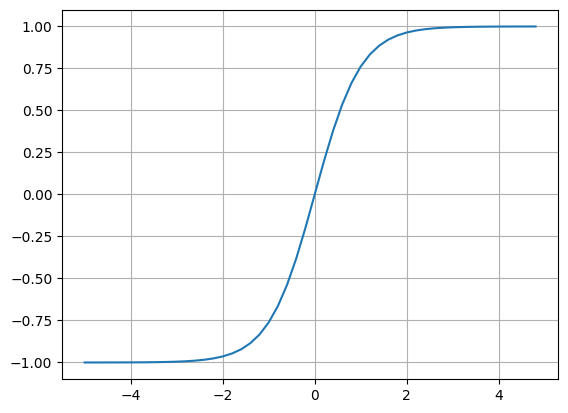

In [51]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [89]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weight w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8882384182341234, label='b')

x1w1 = x1*w1; x1w1.label= 'x1*w1'
x2w2 = x2*w2; x2w2.label= 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label= 'x1w1+x2w2'
n = x1w1x2w2 + b; n.label= 'n'
o = n.tanh(); o.label = 'o'

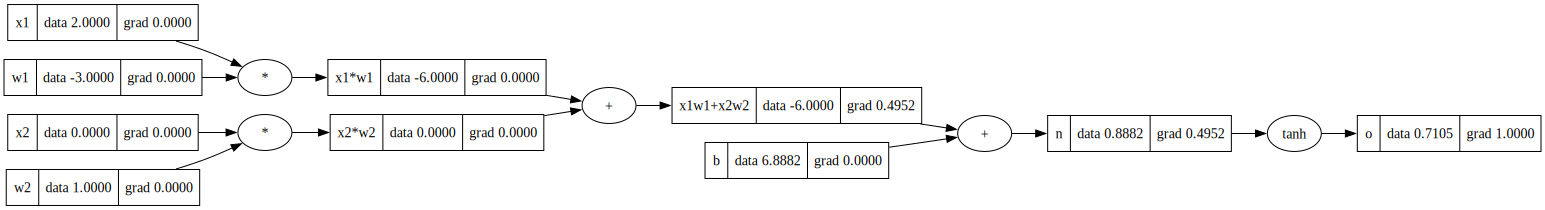

In [99]:
draw_dot(o)

In [91]:
o.grad = 1.0

In [92]:
o._backward()

In [98]:
n._backward()

In [96]:
b._backward()

# manual gradient calculation

In [79]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [74]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [72]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [67]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [64]:
n.grad = 0.5

In [60]:
o.grad = 1.0

In [63]:
1 - o.data**2

0.4951576883792562

In [62]:
o.data

0.7105225623586796

In [ ]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2